Iniciamos con la importación de las librerías necesarias y el cargado del dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimpy import skim
import seaborn as sns

In [4]:
d = pd.read_csv('oef2.csv',index_col=0)


In [5]:
d.head()

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Nombre,,,,,,,,,,,,
St. John_s,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5
Charlottetown,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9
Halifax,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9
Sydney,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8
Yarmouth,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3


Previo al Análisis de Componentes Prinrincipales (PCA), exploremos los datostos con un resumen estadístico de lo que nos proporciona la librería skimpy

In [6]:
skim(d)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 35     │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 12     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column        ┃ NA  ┃ NA %   ┃ mean     ┃ sd      ┃ p0      ┃ p25      ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Enero         │   0 │      0 │   -14.17 │   9.655 │   -32.1 │    -21.1 │  -12.1 │  -6.65 │   4.1 │ ▅▅▇▇▇▃  │  │
│ │ Febrero       │   0 │      0 │   -11.84 │   9.236 │   -33.2 │   -16.35 │  -10.8 │   -6.1 │   5.8 │ ▁▃▂▇▅▂  │  │
│ │ Marzo         │   0 │      0 │   -6.943 │   8.636 │   -31.4 │    -9.85 │   -4.5 │  -2.05 │   6.7 │ ▁▂▁▅▇▂  │  │
│ │ Abril         │   0 │      0 │      0.9 │   7.083 │   -23.1 │      0.4 │    3.2 │    4.5 │   9.1 │  ▁▁ ▇▅  │  │
│ │ Mayo          │   0 │      0 │    7.974 │   5.246 │   -10.9 │      7.5 │    9.3 │  10.95 │  14.1 │ ▁▁▂▁▇▇  │  │
│ │ Junio         │   0 │      0 │    13.43 │    4.05 │    -0.6 │     12.9 │   14.1 │   15.9 │  18.3 │   ▁▂▇▆  │  │
│ │ Julio         │   0 │      0 │    16.44 │    3.59 │     4.1 │     15.3 │   17.3 │  18.65 │  20.9 │ ▁▁▁▃▇▇  │  │
│ │ Agosto        │   0 │      0 │    15.35 │   3.702 │     2.4 │     14.1 │   16.1 │   17.8 │  19.8 │ ▁▁▁▂▇▇  │  │
│ │ Septiembre    │   0 │      0 │    10.45 │   4.355 │    -5.1 │      9.6 │   11.6 │  13.55 │  15.5 │ ▁ ▂▂▆▇  │  │
│ │ Octubre       │   0 │      0 │    4.369 │   5.702 │   -15.1 │     3.65 │    6.1 │   8.25 │  10.8 │ ▁▁▁▂▆▇  │  │
│ │ Noviembre     │   0 │      0 │     -3.4 │   7.734 │   -24.5 │    -7.35 │   -2.6 │      3 │   7.2 │ ▁▁▃▅▇▇  │  │
│ │ Diciembre     │   0 │      0 │   -10.63 │   8.962 │   -29.3 │   -16.55 │     -9 │   -3.5 │   5.3 │ ▃▂▆▇▆▃  │  │
│ └───────────────┴─────┴────────┴──────────┴─────────┴─────────┴──────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Ahora si, inicializamos PCA con dos componentes.

In [7]:
pca=PCA(2) # se puede especificar máximo número de componentes o % varianza explicada que se quiere alcanzar
pca.fit(d)

PCA(n_components=2)

Veamos que los dos primeros componentes explican bastante la varianza de los datos.

In [8]:
#https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [9]:
pca_summary(pca, d)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,22.150262,0.893277,0.893277
PC2,6.768672,0.083413,0.976690


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,22.150262,0.893277,0.893277
PC2,6.768672,0.083413,0.976690


Mostramos el gráfico solicitado, el valor de cada componente por entrada.

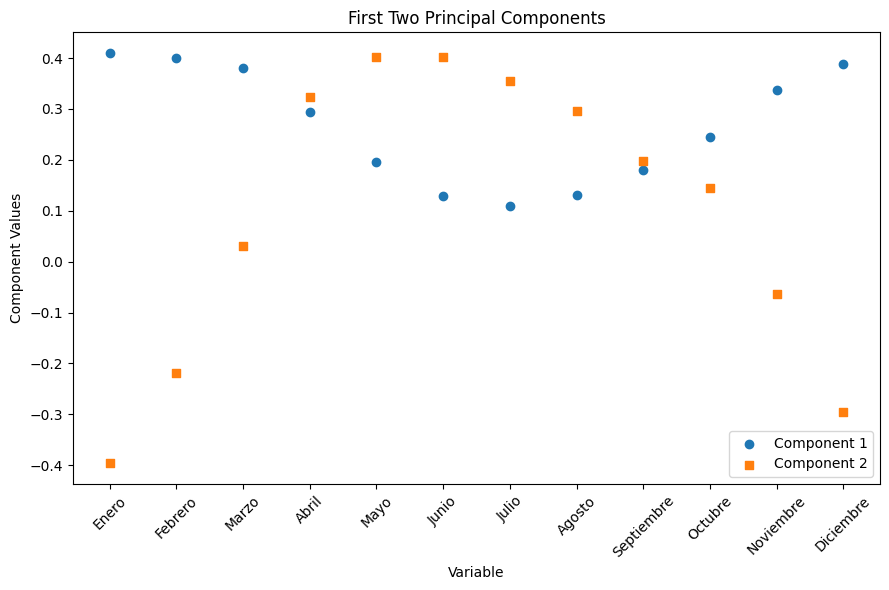

In [10]:
components = pca.components_
comp1 = components[0]
comp2 = components[1]
variables = d.columns.values  # Get variable names

plt.figure(figsize=(9, 6))

plt.scatter(variables, comp1, label='Component 1', marker='o')
plt.scatter(variables, comp2, label='Component 2', marker='s')

plt.title('First Two Principal Components')
plt.xlabel('Variable')
plt.ylabel('Component Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()

plt.tight_layout()
plt.show()


Vemos que el primer componente, que explica la mayor varianza, indica los meses asociados a una menor temperatura, mientras que el segundo componente indica los meses asociados a una mayor temperatura. Es decir, la mayor variaza en la temperatura ocurre en invierno, pues algunas regiones, especialmente en el norte, llegan a temperaturas extremadamente bajas, mientras que en verano, algunas regiones alcanzan temperaturas más altas que otras. Así mismo, notamos que el segundo componente también incluye valores negativos en invierno, dando a entender que las regiones donde se observan temperaturas altas en verano suele ser menos frío en invierno. Es decir, el primer vector promedia las temperaturas invernales, mientras que el segundo contrasta las invernales con las veraniegas.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(9, 6))
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

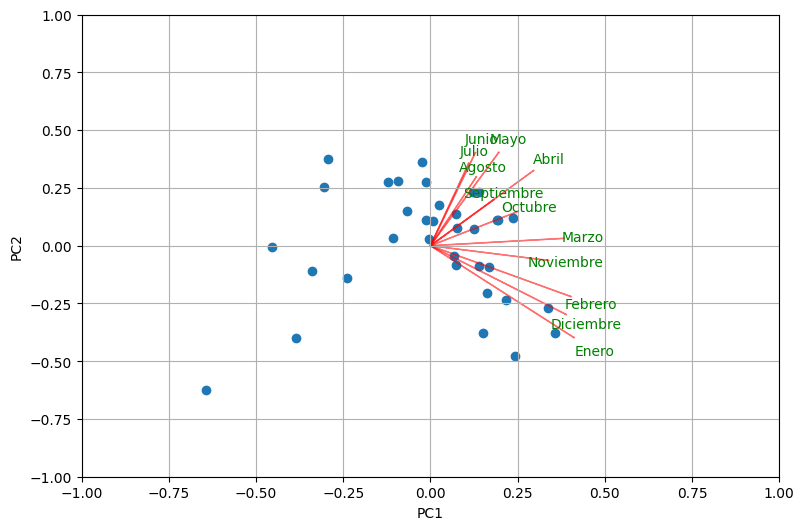

In [12]:
scores=pca.fit_transform(d)
myplot(scores[:,0:2],np.transpose(pca.components_[0:2, :]),labels=d.columns.values)

En el biplot, vemos que las estaciones forman una "V" igual que Canadá, pero en este caso está invertida hacia abajo. Recordemos que las direcciones principales no son únicas, pues menos la dirección mantiene todos los rquerimientos de PCA. Por esto, si la segunda componente fuera el negativo de la obtenida, podemos ver una semejanza con el mapa canadiense, con el primer componente explicando la diferencia entre las estaciones del este y del oeste, y la segunda los del norte con el sur.